## Importing Lib and Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Reading Files

In [2]:
data = pd.read_csv('Palestine Body Count.csv')

In [3]:
backup=data.rename(columns = {'Palestinians Injuries':'Palestinians_Injuries',
                                'Israelis Injuries':'Israelis_Injuries',
                               'Palestinians Killed':'Palestinians_Killed',
                                'Israelis Killed':'Israelis_Killed'})

In [4]:
backup

Year      Month Palestinians_Injuries Israelis_Injuries  \
0    2000.0   DECEMBER                   781               NaN   
1    2000.0   NOVEMBER                  3838               NaN   
2    2000.0    OCTOBER                  5984               NaN   
3    2000.0  SEPTEMBER                   NaN               NaN   
4    2001.0   DECEMBER                   304               NaN   
..      ...        ...                   ...               ...   
246  2021.0      MARCH                   NaN               NaN   
247  2021.0      APRIL                   NaN               NaN   
248  2021.0        MAY                   NaN               NaN   
249     NaN        NaN                   NaN               NaN   
250     NaN        NaN               111,475             5,160   

    Palestinians_Killed Israelis_Killed  
0                    51               8  
1                   112              22  
2                   104              10  
3                    16               1  
4                    67              36  
..                  ...             ...  
246                   4               0  
247                   1               0  
248                  26               3  
249                 NaN             NaN  
250              10,000           1,275  

[251 rows x 6 columns]

In [5]:
backup = backup.fillna(0)

In [6]:
backup.drop(backup.index[249:251], inplace = True)

In [7]:
backup

Year      Month Palestinians_Injuries Israelis_Injuries  \
0    2000.0   DECEMBER                   781                 0   
1    2000.0   NOVEMBER                  3838                 0   
2    2000.0    OCTOBER                  5984                 0   
3    2000.0  SEPTEMBER                     0                 0   
4    2001.0   DECEMBER                   304                 0   
..      ...        ...                   ...               ...   
244  2021.0    JANUARY                     0                 0   
245  2021.0   FEBRUARY                     0                 0   
246  2021.0      MARCH                     0                 0   
247  2021.0      APRIL                     0                 0   
248  2021.0        MAY                     0                 0   

    Palestinians_Killed Israelis_Killed  
0                    51               8  
1                   112              22  
2                   104              10  
3                    16               1  
4                    67              36  
..                  ...             ...  
244                   4               0  
245                   1               0  
246                   4               0  
247                   1               0  
248                  26               3  

[249 rows x 6 columns]

In [8]:
backup["Palestinians_Killed"]=(backup["Palestinians_Killed"].replace(',', '.'))
backup["Israelis_Killed"]=(backup["Israelis_Killed"].replace(',', '.'))
backup["Palestinians_Injuries"]=(backup["Palestinians_Injuries"].replace(',', '.'))
backup["Israelis_Injuries"]=(backup["Israelis_Injuries"].replace(',', '.'))

In [9]:
backup["Palestinians_Injuries"].iloc[165]=0
backup["Israelis_Injuries"].iloc[165]=0
backup["Palestinians_Injuries"].iloc[203]=0
backup["Israelis_Injuries"].iloc[203]=0
backup["Month"].iloc[203]="MAY"

/home/perman/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
backup

Year      Month Palestinians_Injuries Israelis_Injuries  \
0    2000.0   DECEMBER                   781                 0   
1    2000.0   NOVEMBER                  3838                 0   
2    2000.0    OCTOBER                  5984                 0   
3    2000.0  SEPTEMBER                     0                 0   
4    2001.0   DECEMBER                   304                 0   
..      ...        ...                   ...               ...   
244  2021.0    JANUARY                     0                 0   
245  2021.0   FEBRUARY                     0                 0   
246  2021.0      MARCH                     0                 0   
247  2021.0      APRIL                     0                 0   
248  2021.0        MAY                     0                 0   

    Palestinians_Killed Israelis_Killed  
0                    51               8  
1                   112              22  
2                   104              10  
3                    16               1  
4                    67              36  
..                  ...             ...  
244                   4               0  
245                   1               0  
246                   4               0  
247                   1               0  
248                  26               3  

[249 rows x 6 columns]

In [11]:
backup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    float64
 1   Month                  249 non-null    object 
 2   Palestinians_Injuries  249 non-null    object 
 3   Israelis_Injuries      249 non-null    object 
 4   Palestinians_Killed    249 non-null    object 
 5   Israelis_Killed        249 non-null    object 
dtypes: float64(1), object(5)
memory usage: 13.6+ KB


In [12]:
backup["Palestinians_Killed"]=backup["Palestinians_Killed"].apply(float)
backup["Israelis_Killed"]=backup["Israelis_Killed"].apply(float)
backup["Palestinians_Injuries"]=backup["Palestinians_Injuries"].apply(float)
backup["Israelis_Injuries"]=backup["Israelis_Injuries"].apply(float)

In [13]:
backup["Palestinian_Casualties"]=(backup["Palestinians_Killed"]+backup["Palestinians_Injuries"])
backup["Israelis_Casualties"]=(backup["Israelis_Killed"]+backup["Israelis_Injuries"])
backup["Total_Casualties"]=(backup["Palestinian_Casualties"]+backup["Israelis_Casualties"])

In [14]:
backup

Year      Month  Palestinians_Injuries  Israelis_Injuries  \
0    2000.0   DECEMBER                  781.0                0.0   
1    2000.0   NOVEMBER                 3838.0                0.0   
2    2000.0    OCTOBER                 5984.0                0.0   
3    2000.0  SEPTEMBER                    0.0                0.0   
4    2001.0   DECEMBER                  304.0                0.0   
..      ...        ...                    ...                ...   
244  2021.0    JANUARY                    0.0                0.0   
245  2021.0   FEBRUARY                    0.0                0.0   
246  2021.0      MARCH                    0.0                0.0   
247  2021.0      APRIL                    0.0                0.0   
248  2021.0        MAY                    0.0                0.0   

     Palestinians_Killed  Israelis_Killed  Palestinian_Casualties  \
0                   51.0              8.0                   832.0   
1                  112.0             22.0                  3950.0   
2                  104.0             10.0                  6088.0   
3                   16.0              1.0                    16.0   
4                   67.0             36.0                   371.0   
..                   ...              ...                     ...   
244                  4.0              0.0                     4.0   
245                  1.0              0.0                     1.0   
246                  4.0              0.0                     4.0   
247                  1.0              0.0                     1.0   
248                 26.0              3.0                    26.0   

     Israelis_Casualties  Total_Casualties  
0                    8.0             840.0  
1                   22.0            3972.0  
2                   10.0            6098.0  
3                    1.0              17.0  
4                   36.0             407.0  
..                   ...               ...  
244                  0.0               4.0  
245                  0.0               1.0  
246                  0.0               4.0  
247                  0.0               1.0  
248                  3.0              29.0  

[249 rows x 9 columns]

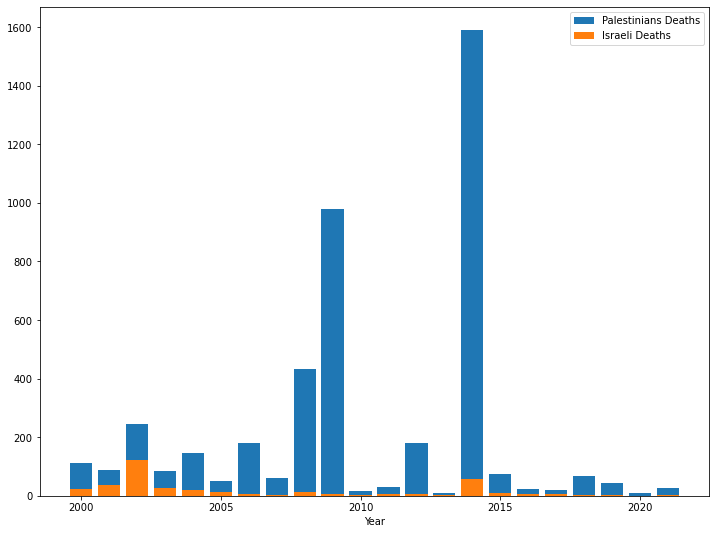

In [27]:
plt.figure(figsize=(12,9))
plt.bar(backup['Year'],backup['Palestinians_Killed'] , label = "Palestinians Deaths" ) 
plt.bar(backup['Year'],backup['Israelis_Killed'] , label = "Israeli Deaths")
plt.xlabel('Year')
plt.legend()
plt.show()

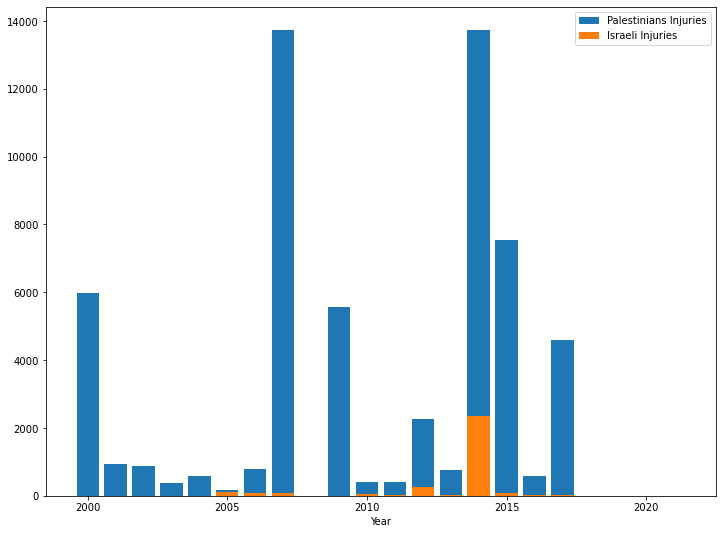

In [31]:
plt.figure(figsize=(12,9))
plt.bar(backup['Year'],backup['Palestinians_Injuries'] , label = "Palestinians Injuries" ) 
plt.bar(backup['Year'],backup['Israelis_Injuries'] , label = "Israeli Injuries")
plt.xlabel('Year')
plt.legend()
plt.show()

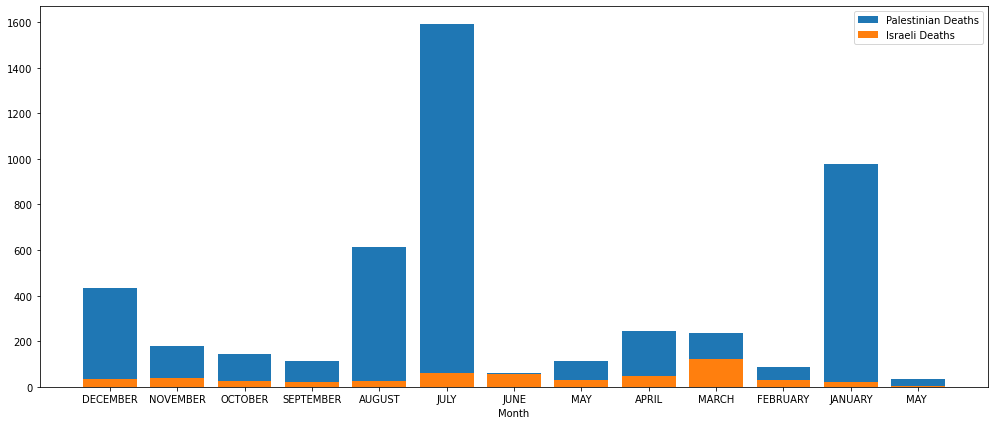

In [32]:
plt.figure(figsize=(17,7))
plt.bar(backup['Month'],backup['Palestinians_Killed'] , label = "Palestinian Deaths" ) 
plt.bar(backup['Month'],backup['Israelis_Killed'] , label = "Israeli Deaths")
plt.xlabel('Month')
plt.legend()
plt.show()

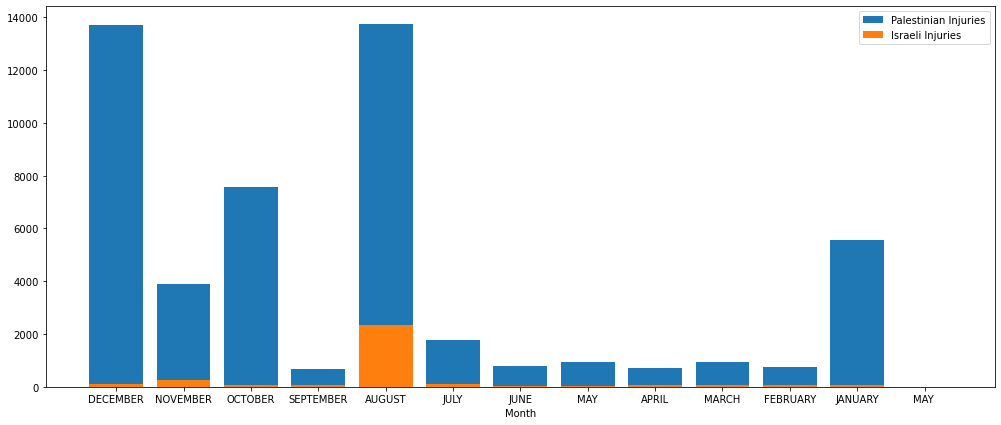

In [33]:
plt.figure(figsize=(17,7))
plt.bar(backup['Month'],backup['Palestinians_Injuries'] , label = "Palestinian Injuries" ) 
plt.bar(backup['Month'],backup['Israelis_Injuries'] , label = "Israeli Injuries")
plt.xlabel('Month')
plt.legend()
plt.show()

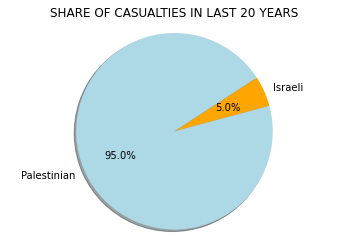

In [37]:
lis1=[backup["Israelis_Casualties"].sum(),backup["Palestinian_Casualties"].sum()]
my_data = lis1
my_labels = ['Israeli','Palestinian']

plt.pie(my_data,labels=my_labels,autopct='%1.1f%%',startangle=15, shadow = True,colors=['orange','lightblue'])
plt.title('SHARE OF CASUALTIES IN LAST 20 YEARS')
plt.axis('equal')
plt.show()

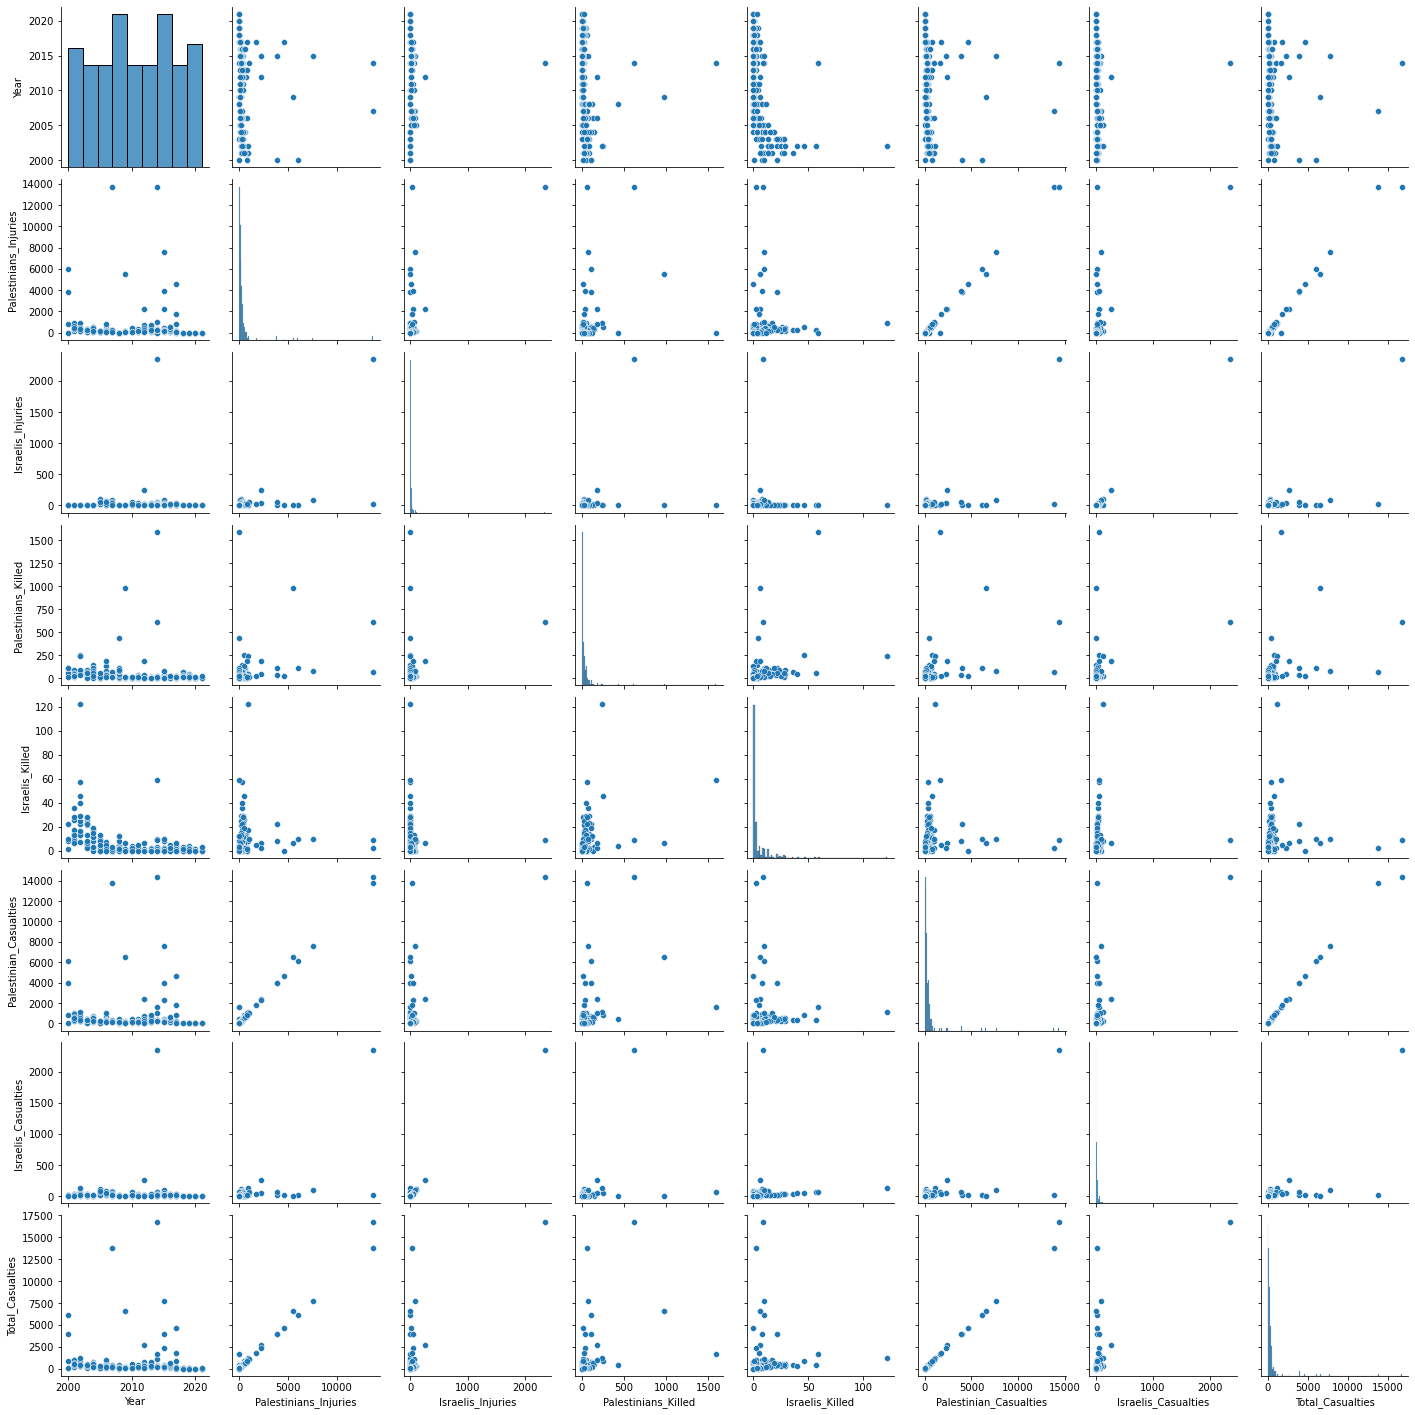

In [38]:
sns.pairplot(backup) 

In [39]:
backup.corr()

Year  Palestinians_Injuries  Israelis_Injuries  \
Year                    1.000000              -0.059263           0.032843   
Palestinians_Injuries  -0.059263               1.000000           0.593435   
Israelis_Injuries       0.032843               0.593435           1.000000   
Palestinians_Killed    -0.106864               0.305607           0.279331   
Israelis_Killed        -0.435910               0.076673           0.008386   
Palestinian_Casualties -0.066653               0.996682           0.599841   
Israelis_Casualties    -0.001065               0.597208           0.996992   
Total_Casualties       -0.062787               0.993279           0.657461   

                        Palestinians_Killed  Israelis_Killed  \
Year                              -0.106864        -0.435910   
Palestinians_Injuries              0.305607         0.076673   
Israelis_Injuries                  0.279331         0.008386   
Palestinians_Killed                1.000000         0.395193   
Israelis_Killed                    0.395193         1.000000   
Palestinian_Casualties             0.382089         0.108196   
Israelis_Casualties                0.308941         0.085867   
Total_Casualties                   0.388271         0.109796   

                        Palestinian_Casualties  Israelis_Casualties  \
Year                                 -0.066653            -0.001065   
Palestinians_Injuries                 0.996682             0.597208   
Israelis_Injuries                     0.599841             0.996992   
Palestinians_Killed                   0.382089             0.308941   
Israelis_Killed                       0.108196             0.085867   
Palestinian_Casualties                1.000000             0.606033   
Israelis_Casualties                   0.606033             1.000000   
Total_Casualties                      0.997225             0.663566   

                        Total_Casualties  
Year                           -0.062787  
Palestinians_Injuries           0.993279  
Israelis_Injuries               0.657461  
Palestinians_Killed             0.388271  
Israelis_Killed                 0.109796  
Palestinian_Casualties          0.997225  
Israelis_Casualties             0.663566  
Total_Casualties                1.000000

<AxesSubplot:>

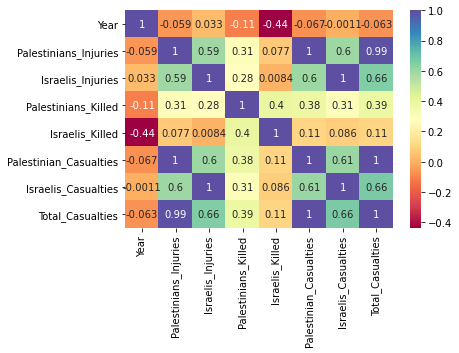

In [42]:
sns.heatmap(backup.corr(),annot=True, cmap='Spectral')

/home/perman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/perman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


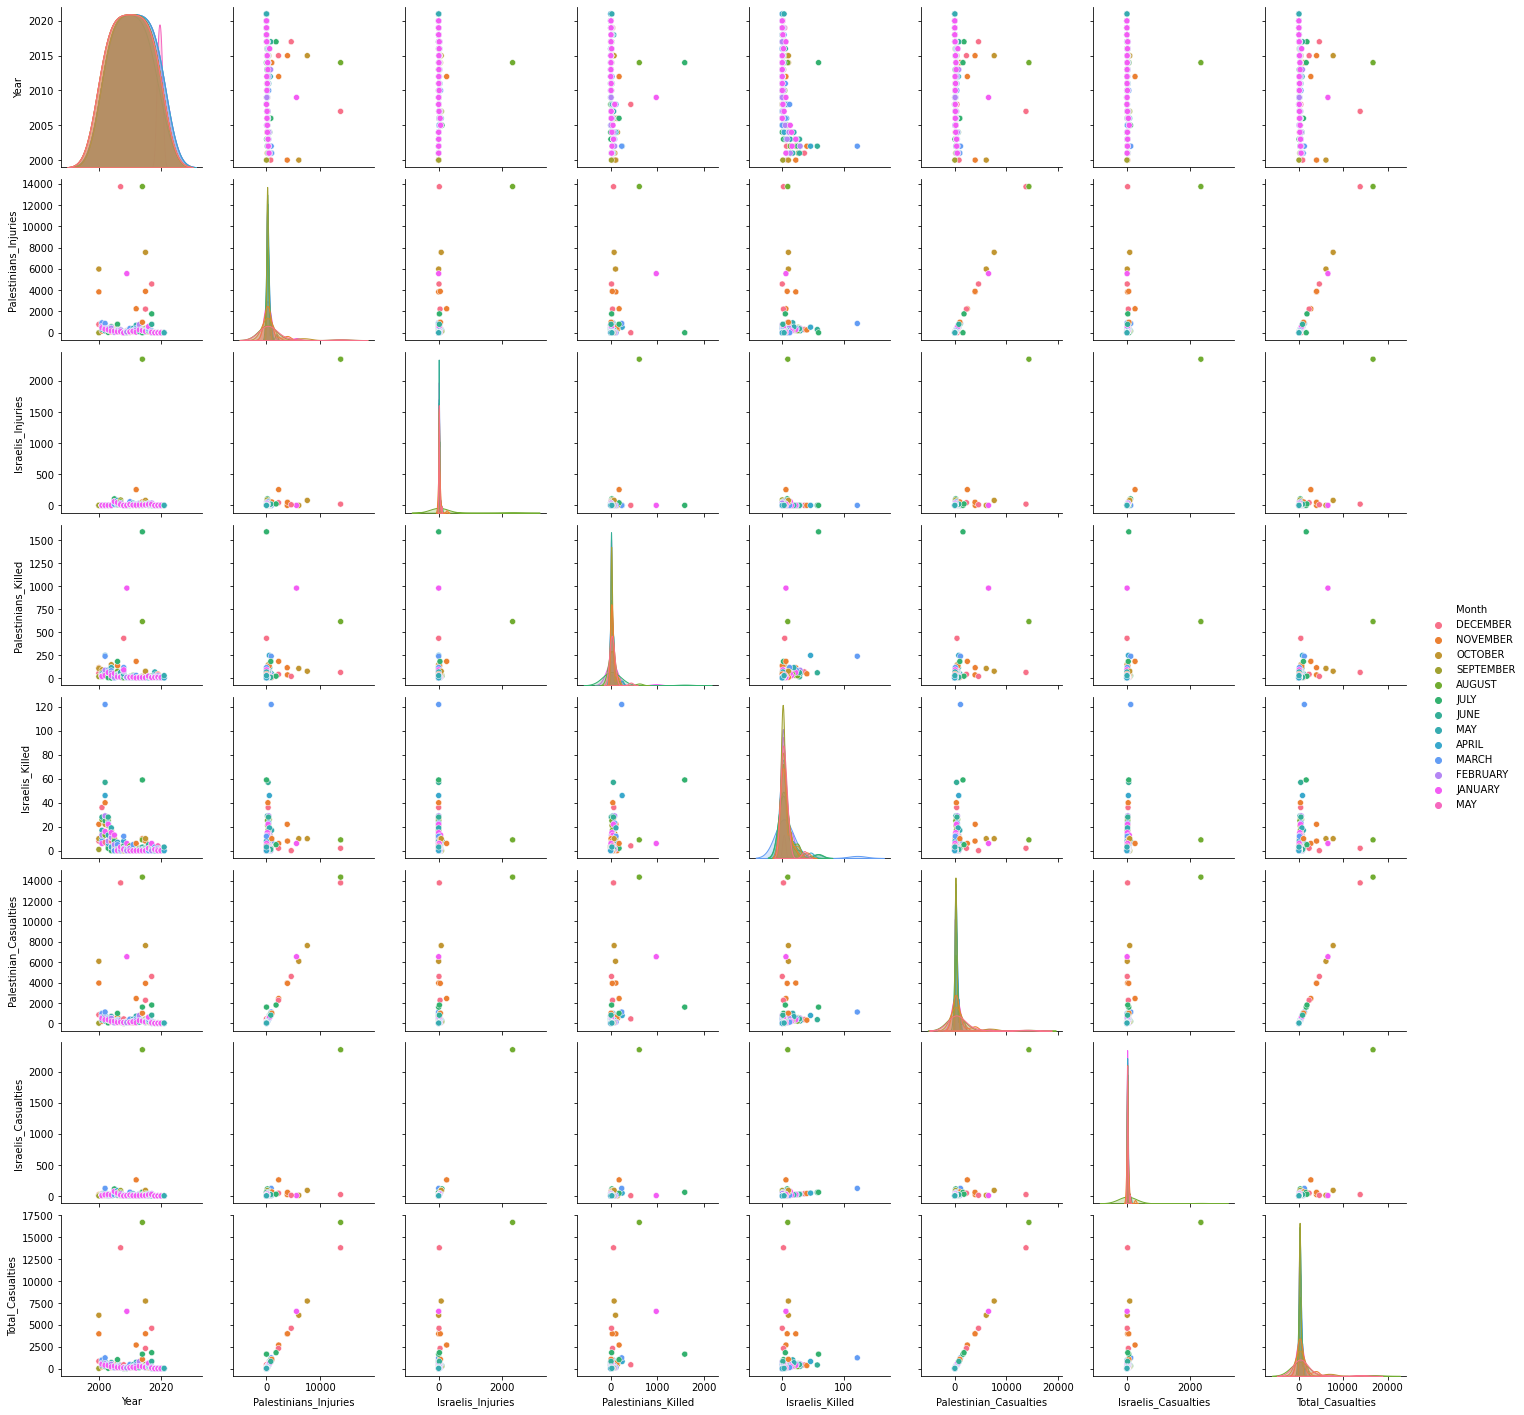

In [43]:
sns.pairplot(backup,hue='Month')

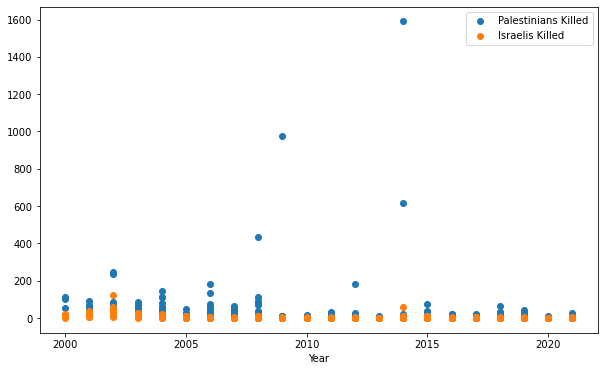

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(backup['Year'],backup['Palestinians_Killed'] , label = "Palestinians Killed" ) 
plt.scatter(backup['Year'],backup['Israelis_Killed'] , label = "Israelis Killed")
plt.xlabel('Year')
plt.legend()
plt.show()

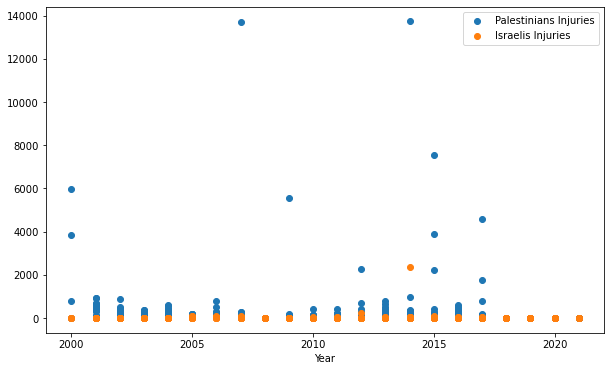

In [47]:
plt.figure(figsize=(10,6)) 
plt.scatter(backup['Year'],backup['Palestinians_Injuries'] , label = "Palestinians Injuries")
plt.scatter(backup['Year'],backup['Israelis_Injuries'] , label = "Israelis Injuries")
plt.xlabel('Year')
plt.legend()
plt.show()

In [49]:
import plotly.express as px
px.histogram(backup['Israelis_Killed'],x="Israelis_Killed") 

In [54]:
import plotly.express as px
px.histogram(backup['Israelis_Killed'],x="Israelis_Killed") 

In [55]:
X = backup['Palestinians_Injuries'].values.reshape(-1,1) 
y = backup['Israelis_Injuries'] 

#  OLS = ordinary least square method. 

import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)                                   
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Israelis_Injuries   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     134.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           4.41e-25
Time:                        18:01:53   Log-Likelihood:                -1546.1
No. Observations:                 249   AIC:                             3096.
Df Residuals:                     247   BIC:                             3103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4156      8.006     -0.801      0.424     -22.185       9.353
x1             0.0606      0.005     11.588      0.000       0.050       0.071
==============================================================================
Omnibus:                      367.634   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124200.168
Skew:                           6.528   Prob(JB):                         0.00
Kurtosis:                     111.631   Cond. No.                     1.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
from scipy.stats import pearsonr

data1 = backup['Palestinians_Injuries']
data2 = backup['Israelis_Injuries'] 
data3 = backup['Palestinians_Killed']
data4 = backup['Israelis_Killed'] 

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.593


In [57]:
corr, _ = pearsonr(data3,data4) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.395


In [58]:
fig = px.bar(backup, 
             x='Year', y='Israelis_Injuries', color_discrete_sequence=['#2B3A67'],
             title='Israelis Injuried Yearly', text='Month')
fig.show()

In [59]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

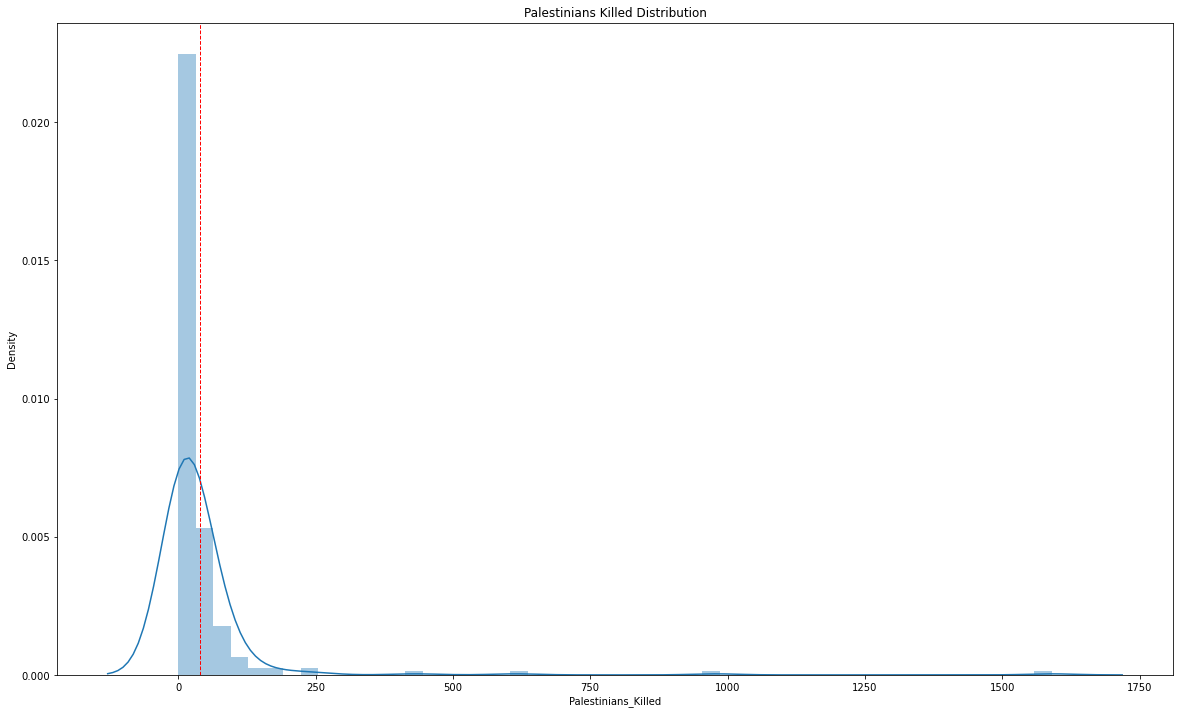

In [63]:
plt.figure(figsize=(20,12)) 
sns.distplot(backup['Palestinians_Killed'])
plt.axvline(backup['Palestinians_Killed'].values.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Palestinians Killed Distribution');

In [64]:
fig = px.scatter_matrix(backup, dimensions=['Palestinians_Injuries','Israelis_Injuries','Palestinians_Killed', 'Israelis_Killed'], color="Month")
fig.show()

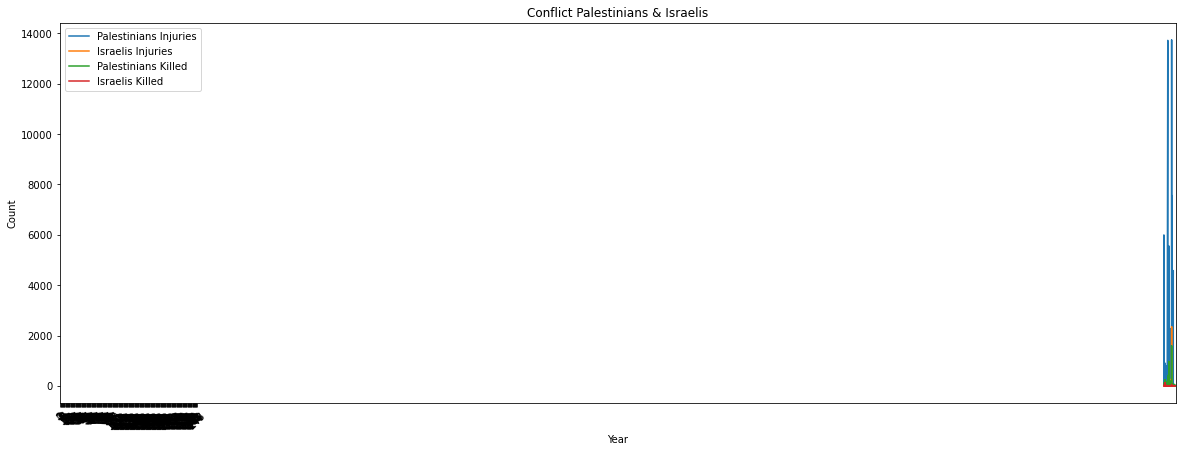

In [67]:
plt.figure(figsize=(20,7))
plt.plot(backup['M'],backup['Palestinians_Injuries'], label='Palestinians Injuries')
plt.plot(backup['Year'],backup['Israelis_Injuries'], label='Israelis Injuries')
plt.plot(backup['Year'],backup['Palestinians_Killed'], label='Palestinians Killed')
plt.plot(backup['Year'],backup['Israelis_Killed'], label='Israelis Killed')
plt.legend()
#plt.grid()
plt.title('Conflict Palestinians & Israelis')
plt.xticks(backup.index,rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Data Frame created according to No Dead people

In [18]:
killing_data = pd.DataFrame()

In [19]:
killing_data = backup[['Year', 'Month', 'Palestinians_Killed','Israelis_Killed']].copy()

In [20]:
killing_data   

Year      Month  Palestinians_Killed  Israelis_Killed
0    2000.0   DECEMBER                 51.0              8.0
1    2000.0   NOVEMBER                112.0             22.0
2    2000.0    OCTOBER                104.0             10.0
3    2000.0  SEPTEMBER                 16.0              1.0
4    2001.0   DECEMBER                 67.0             36.0
..      ...        ...                  ...              ...
244  2021.0    JANUARY                  4.0              0.0
245  2021.0   FEBRUARY                  1.0              0.0
246  2021.0      MARCH                  4.0              0.0
247  2021.0      APRIL                  1.0              0.0
248  2021.0        MAY                 26.0              3.0

[249 rows x 4 columns]

In [21]:
killing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 249 non-null    float64
 1   Month                249 non-null    object 
 2   Palestinians_Killed  249 non-null    float64
 3   Israelis_Killed      249 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.7+ KB


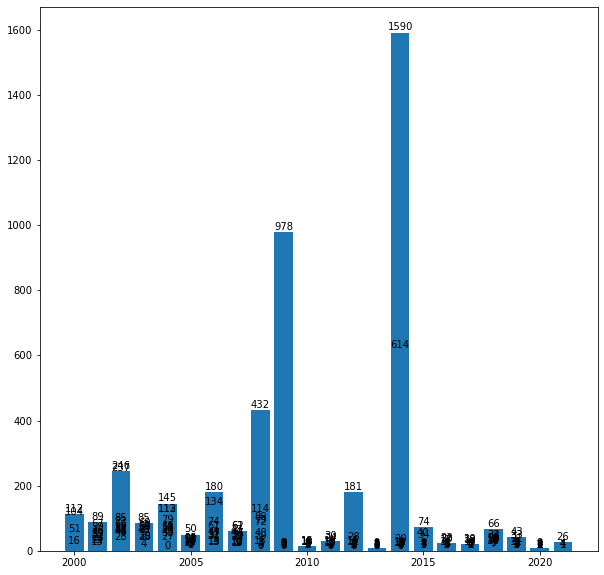

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
plot = plt.bar(killing_data['Year'], killing_data['Palestinians_Killed'])
for rect in plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom')
plt.show();

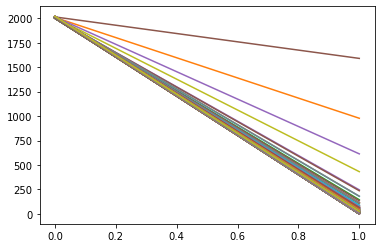

In [47]:
fig, ax =plt.subplots()
ax.plot([killing_data['Year'],killing_data['Palestinians_Killed']])

In [85]:
DF= pd.DataFrame(backup.groupby("Year")["Palestinians_Killed"].max().sort_values(ascending = False))
DF.reset_index(level=0,inplace=True)
fig = px.pie(DF,
             values='Palestinians_Killed',
             names='Year',
             hover_data=['Palestinians_Killed'],
             labels={'country':'country'}
            )
fig.update_layout(title='<b>Palestinians Killed By Year Hover Pie-chart<b>',
                  titlefont={'size': 24,
                             'family': 'Serif',
                            },
                  showlegend=False, 
                  width=600, 
                  height=600)
fig.show()

In [63]:
ff = pd.DataFrame(killing_data.groupby("Year")["Palestinians_Killed"].sum())
ff.reset_index(level=0,inplace=True)
ff

Year  Palestinians_Killed
0   2000.0                283.0
1   2001.0                470.0
2   2002.0               1032.0
3   2003.0                588.0
4   2004.0                786.0
5   2005.0                190.0
6   2006.0                665.0
7   2007.0                385.0
8   2008.0                886.0
9   2009.0               1036.0
10  2010.0                 82.0
11  2011.0                117.0
12  2012.0                255.0
13  2013.0                 38.0
14  2014.0               2279.0
15  2015.0                188.0
16  2016.0                115.0
17  2017.0                 96.0
18  2018.0                290.0
19  2019.0                149.0
20  2020.0                 34.0
21  2021.0                 36.0

<AxesSubplot:title={'center':'Palestinians Total Injuries'}, xlabel='Year', ylabel='Palestinians_Killed'>

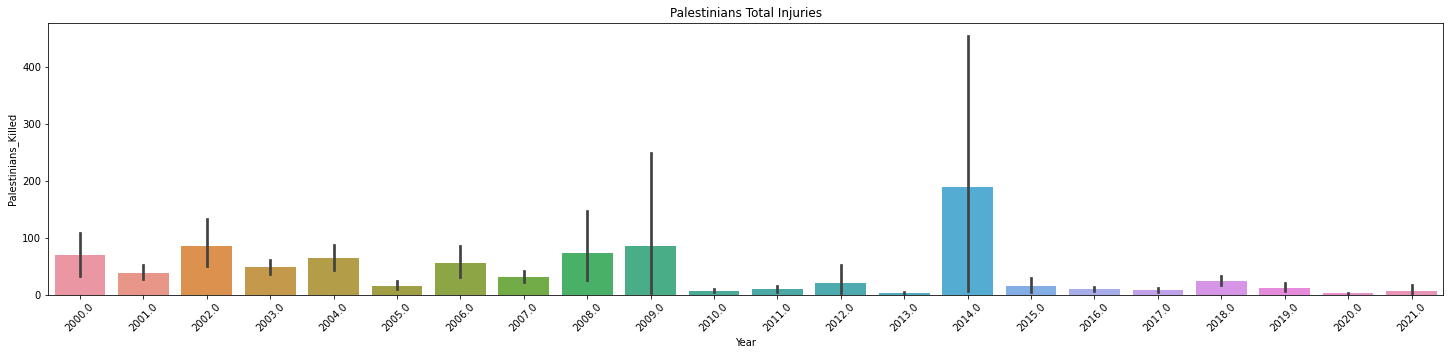

In [71]:
plt.figure(figsize=(25,5))
plt.title('Palestinians Total Injuries')
plt.xticks(rotation=45)
sns.barplot(x='Year', y='Palestinians_Killed', data=killing_data)

In [89]:

fig = px.bar(backup, 
             x='Year', y='Palestinians_Killed', color_discrete_sequence=['#DC143C'],
             title='Palestinians Killed Yearly', text='Month')
fig.show()

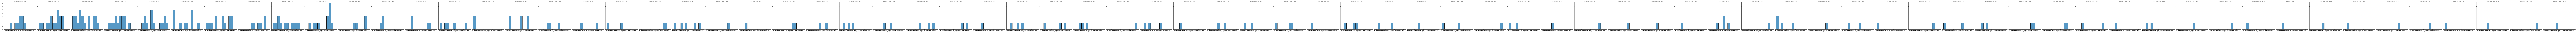

In [93]:
sns.displot(data=killing_data, x="Month", col="Palestinians_Killed", kde=False)

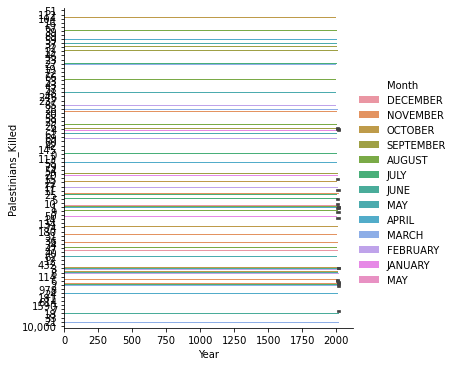

In [97]:
sns.catplot(data=backup, kind="bar", x="Year", y="Palestinians_Killed", hue="Month")

In [ ]:
penguins = sns.load_dataset("backup")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")